In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import MySQLdb
import os
import csv
import datetime

In [3]:
db = MySQLdb.connect('210.102.142.13', "root", "witlab8*", "cas_db")
c = db.cursor()

date = np.genfromtxt('../Classification_By_3hours/SunRise_SunSet/data/date_sunrise_sunset.csv', delimiter=',', dtype='str')
# date = np.genfromtxt('../Classification_By_3hours/SunRise_SunSet/data/test_date_sunrise_sunset.csv', delimiter=',', dtype='str')

cct_data = []
swr_data = []

for j in range(len(date)):
    sql = "select time(date), date(date), cct, cas_swr from natural_tracker left outer join cas_wave_ratio using(date) where date(date) = '"+ str(date[j][0]) + "' order by time(date)"
    c.execute(sql)
    rows = c.fetchall()
    
    sunrise = datetime.datetime.strptime(date[j][1], '%H:%M:%S')
    sunset = datetime.datetime.strptime(date[j][2], '%H:%M:%S')
    
    standard = datetime.datetime.strptime('1900-01-01 00:00:00', '%Y-%m-%d %H:%M:%S')
    
    sunrise = sunrise - standard
    sunset = sunset - standard
    
    start = 0
    end = 0

    for i in range(len(rows)):
        if(rows[i][0] >= sunrise):
            start = i
            print(date[j][0], rows[start][0], sunrise, rows[start+720][0])
            break;
    
    cct_temp = []
    swr_temp = []
    
    for i in range(start, start+720):
        cct_temp.append(rows[i][2])
        swr_temp.append(rows[i][3])
    cct_data.append(cct_temp)
    swr_data.append(swr_temp)
    print(date[j][0] + " saved.")
    print('--------------------------------')
    
print(np.shape(cct_data))

2017-04-13 6:00:00 6:00:00 18:08:00
2017-04-13 saved.
--------------------------------
2017-04-19 5:52:00 5:52:00 17:59:00
2017-04-19 saved.
--------------------------------
2017-04-21 5:49:00 5:49:00 17:55:00
2017-04-21 saved.
--------------------------------
2017-04-22 5:48:00 5:48:00 17:55:00
2017-04-22 saved.
--------------------------------
2017-04-24 5:45:00 5:45:00 17:51:00
2017-04-24 saved.
--------------------------------
2017-05-01 5:37:00 5:37:00 17:43:00
2017-05-01 saved.
--------------------------------
2017-05-02 5:36:00 5:36:00 17:42:00
2017-05-02 saved.
--------------------------------
2017-05-15 5:23:00 5:23:00 17:31:00
2017-05-15 saved.
--------------------------------
2017-05-17 5:22:00 5:22:00 17:28:00
2017-05-17 saved.
--------------------------------
2017-05-18 5:21:00 5:21:00 17:28:00
2017-05-18 saved.
--------------------------------
2017-05-22 5:18:00 5:18:00 17:24:00
2017-05-22 saved.
--------------------------------
2017-05-23 5:18:00 5:18:00 17:26:00
2017-05

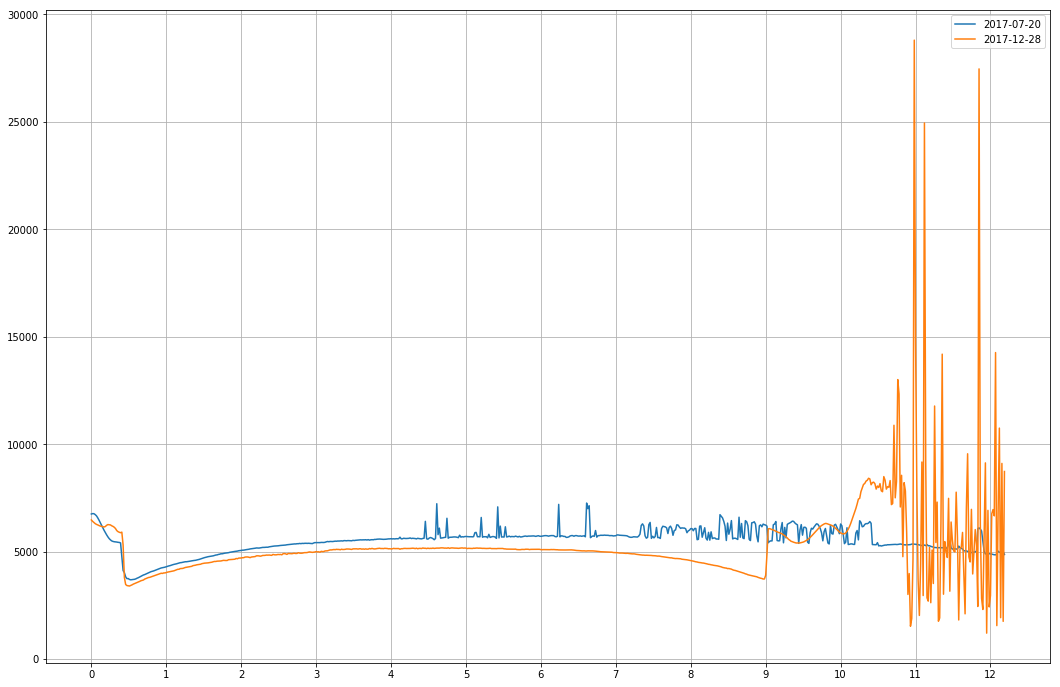

In [36]:
x = np.arange(0, 720, 1)
plt.figure(figsize=(18, 12))
plt.xticks(np.arange(0, len(x), step = 59), ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'])
# plt.plot(x, cct_data[0], label='2017-04-13')
# plt.plot(x, cct_data[13], label='2017-05-30')
# plt.plot(x, cct_data[23], label='2017-06-22')
plt.plot(x, cct_data[27], label='2017-07-20')
# plt.plot(x, cct_data[32], label='2017-08-30')
# plt.plot(x, cct_data[45], label='2017-09-28')
# plt.plot(x, cct_data[53], label='2017-10-31')
# plt.plot(x, cct_data[57], label='2017-11-16')
plt.plot(x, cct_data[58], label='2017-12-28')
# plt.plot(x, cct_data[64], label='2018-01-07')

plt.grid(True)
plt.legend(loc='upper right')
plt.show()